1. Standard BFO

Standard BFO - Best solution: [-0.00660708 -0.00366157], Best fitness: 5.706064041938511e-05


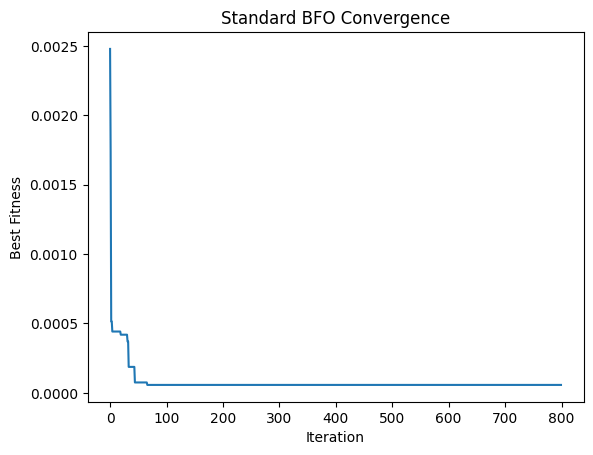

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
population_size = 100
dimension = 2
chemotactic_steps = 200
swim_length = 4
reproduction_steps = 4
elimination_dispersal_events = 2
elimination_probability = 0.25
step_size = 0.1

# Objective function (Sphere function)
def objective_function(x):
    return np.sum(x**2)

# Standard BFO implementation
def standard_bfo():
    # Initialize population
    population = np.random.uniform(-5, 5, (population_size, dimension))
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for elimination in range(elimination_dispersal_events):
        for reproduction in range(reproduction_steps):
            for bacterium in range(population_size):
                current_fitness = objective_function(population[bacterium])
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_solution = population[bacterium].copy()

                for chemotaxis in range(chemotactic_steps):
                    # Tumble
                    direction = np.random.uniform(-1, 1, dimension)
                    direction /= np.linalg.norm(direction)
                    new_position = population[bacterium] + step_size * direction
                    new_fitness = objective_function(new_position)

                    # Swim
                    swim_count = 0
                    while swim_count < swim_length and new_fitness < current_fitness:
                        population[bacterium] = new_position
                        current_fitness = new_fitness
                        new_position = population[bacterium] + step_size * direction
                        new_fitness = objective_function(new_position)
                        swim_count += 1

                    if current_fitness < best_fitness:
                        best_fitness = current_fitness
                        best_solution = population[bacterium].copy()

                fitness_history.append(best_fitness)

            # Reproduction: half with best fitness reproduce, other half dies
            fitness_values = [objective_function(b) for b in population]
            sorted_indices = np.argsort(fitness_values)
            population = population[sorted_indices[:population_size//2]]
            population = np.vstack([population, population])

        # Elimination-dispersal
        for bacterium in range(population_size):
            if np.random.rand() < elimination_probability:
                population[bacterium] = np.random.uniform(-5, 5, dimension)

    return best_solution, best_fitness, fitness_history

# Test Standard BFO
best_solution, best_fitness, history = standard_bfo()
print(f"Standard BFO - Best solution: {best_solution}, Best fitness: {best_fitness}")

plt.plot(history)
plt.title("Standard BFO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.show()

Adaptive BFO

Adaptive BFO - Best solution: [-0.00016136 -0.00040327], Best fitness: 1.886595258528234e-07


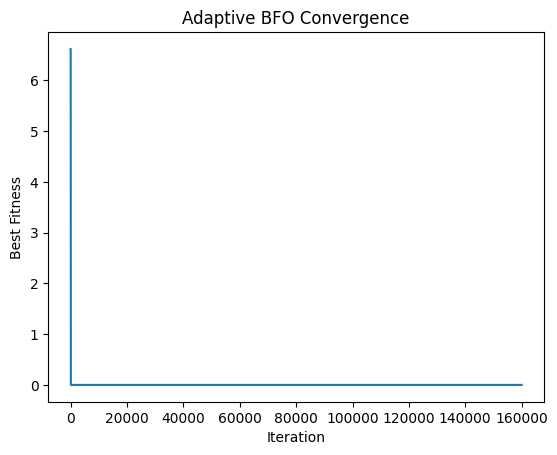

In [2]:
def adaptive_bfo():
    # Initialize population
    population = np.random.uniform(-5, 5, (population_size, dimension))
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    step_sizes = np.full(population_size, step_size)  # Individual step sizes

    for elimination in range(elimination_dispersal_events):
        for reproduction in range(reproduction_steps):
            for bacterium in range(population_size):
                current_fitness = objective_function(population[bacterium])
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_solution = population[bacterium].copy()

                for chemotaxis in range(chemotactic_steps):
                    # Tumble
                    direction = np.random.uniform(-1, 1, dimension)
                    direction /= np.linalg.norm(direction)
                    new_position = population[bacterium] + step_sizes[bacterium] * direction
                    new_fitness = objective_function(new_position)

                    # Swim
                    swim_count = 0
                    while swim_count < swim_length and new_fitness < current_fitness:
                        population[bacterium] = new_position
                        current_fitness = new_fitness
                        new_position = population[bacterium] + step_sizes[bacterium] * direction
                        new_fitness = objective_function(new_position)
                        swim_count += 1

                    # Adaptive step size adjustment
                    if new_fitness < current_fitness:
                        step_sizes[bacterium] *= 1.1  # Increase if improving
                    else:
                        step_sizes[bacterium] *= 0.9  # Decrease if not improving

                    step_sizes[bacterium] = np.clip(step_sizes[bacterium], 0.01, 0.5)

                    if current_fitness < best_fitness:
                        best_fitness = current_fitness
                        best_solution = population[bacterium].copy()

                    fitness_history.append(best_fitness)

            # Reproduction with step size inheritance
            fitness_values = [objective_function(b) for b in population]
            sorted_indices = np.argsort(fitness_values)
            population = population[sorted_indices[:population_size//2]]
            step_sizes = step_sizes[sorted_indices[:population_size//2]]
            population = np.vstack([population, population])
            step_sizes = np.concatenate([step_sizes, step_sizes])

        # Elimination-dispersal with reset step size
        for bacterium in range(population_size):
            if np.random.rand() < elimination_probability:
                population[bacterium] = np.random.uniform(-5, 5, dimension)
                step_sizes[bacterium] = step_size

    return best_solution, best_fitness, fitness_history

# Test Adaptive BFO
best_solution, best_fitness, history = adaptive_bfo()
print(f"Adaptive BFO - Best solution: {best_solution}, Best fitness: {best_fitness}")

plt.plot(history)
plt.title("Adaptive BFO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.show()

Mutation + Adaptive BFO

Mutation+Adaptive BFO - Best solution: [5.67500871e-05 8.10667213e-05], Best fitness: 9.792385677664806e-09


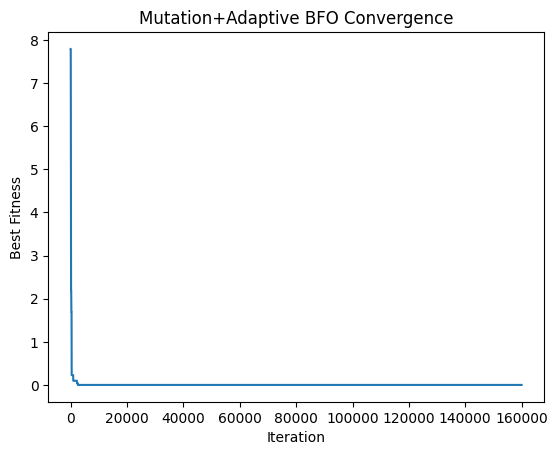

In [3]:
def mutation_adaptive_bfo():
    # Initialize population
    population = np.random.uniform(-5, 5, (population_size, dimension))
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    step_sizes = np.full(population_size, step_size)
    mutation_rate = 0.1

    for elimination in range(elimination_dispersal_events):
        for reproduction in range(reproduction_steps):
            for bacterium in range(population_size):
                current_fitness = objective_function(population[bacterium])
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_solution = population[bacterium].copy()

                for chemotaxis in range(chemotactic_steps):
                    # Tumble with possible mutation
                    if np.random.rand() < mutation_rate:
                        population[bacterium] = np.random.uniform(-5, 5, dimension)
                        current_fitness = objective_function(population[bacterium])
                    else:
                        direction = np.random.uniform(-1, 1, dimension)
                        direction /= np.linalg.norm(direction)
                        new_position = population[bacterium] + step_sizes[bacterium] * direction
                        new_fitness = objective_function(new_position)

                        # Swim
                        swim_count = 0
                        while swim_count < swim_length and new_fitness < current_fitness:
                            population[bacterium] = new_position
                            current_fitness = new_fitness
                            new_position = population[bacterium] + step_sizes[bacterium] * direction
                            new_fitness = objective_function(new_position)
                            swim_count += 1

                        # Adaptive step size
                        if new_fitness < current_fitness:
                            step_sizes[bacterium] *= 1.1
                        else:
                            step_sizes[bacterium] *= 0.9
                        step_sizes[bacterium] = np.clip(step_sizes[bacterium], 0.01, 0.5)

                    if current_fitness < best_fitness:
                        best_fitness = current_fitness
                        best_solution = population[bacterium].copy()

                    fitness_history.append(best_fitness)

            # Reproduction with mutation
            fitness_values = [objective_function(b) for b in population]
            sorted_indices = np.argsort(fitness_values)
            population = population[sorted_indices[:population_size//2]]
            step_sizes = step_sizes[sorted_indices[:population_size//2]]

            # Apply mutation to offspring
            offspring = population.copy()
            mask = np.random.rand(population_size//2, dimension) < mutation_rate
            random_values = np.random.uniform(-5, 5, (population_size//2, dimension))
            offspring = np.where(mask, random_values, offspring)

            population = np.vstack([population, offspring])
            step_sizes = np.concatenate([step_sizes, step_sizes])

        # Elimination-dispersal
        for bacterium in range(population_size):
            if np.random.rand() < elimination_probability:
                population[bacterium] = np.random.uniform(-5, 5, dimension)
                step_sizes[bacterium] = step_size

    return best_solution, best_fitness, fitness_history

# Test Mutation + Adaptive BFO
best_solution, best_fitness, history = mutation_adaptive_bfo()
print(f"Mutation+Adaptive BFO - Best solution: {best_solution}, Best fitness: {best_fitness}")

plt.plot(history)
plt.title("Mutation+Adaptive BFO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.show()

Local Search BFO

Local Search BFO - Best solution: [-0.00180147 -0.00288329], Best fitness: 1.1558663621946868e-05


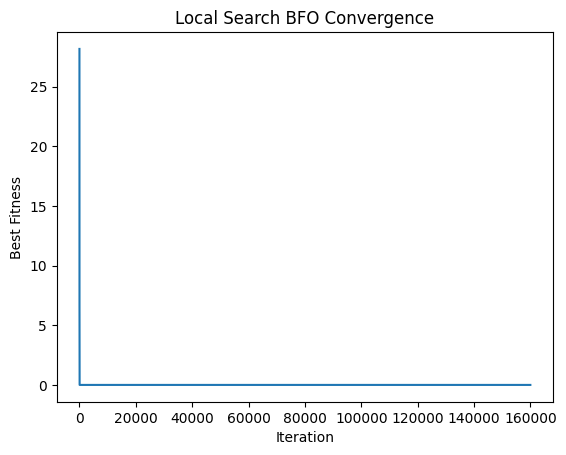

In [4]:
def local_search_bfo():
    # Initialize population
    population = np.random.uniform(-5, 5, (population_size, dimension))
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    local_search_step = 0.01
    local_search_iterations = 10

    for elimination in range(elimination_dispersal_events):
        for reproduction in range(reproduction_steps):
            for bacterium in range(population_size):
                current_fitness = objective_function(population[bacterium])
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_solution = population[bacterium].copy()

                for chemotaxis in range(chemotactic_steps):
                    # Tumble
                    direction = np.random.uniform(-1, 1, dimension)
                    direction /= np.linalg.norm(direction)
                    new_position = population[bacterium] + step_size * direction
                    new_fitness = objective_function(new_position)

                    # Swim
                    swim_count = 0
                    while swim_count < swim_length and new_fitness < current_fitness:
                        population[bacterium] = new_position
                        current_fitness = new_fitness
                        new_position = population[bacterium] + step_size * direction
                        new_fitness = objective_function(new_position)
                        swim_count += 1

                    # Local search around best position
                    if current_fitness < best_fitness * 1.1:  # Close to best
                        for _ in range(local_search_iterations):
                            local_direction = np.random.uniform(-1, 1, dimension)
                            local_direction /= np.linalg.norm(local_direction)
                            local_position = population[bacterium] + local_search_step * local_direction
                            local_fitness = objective_function(local_position)
                            if local_fitness < current_fitness:
                                population[bacterium] = local_position
                                current_fitness = local_fitness

                    if current_fitness < best_fitness:
                        best_fitness = current_fitness
                        best_solution = population[bacterium].copy()

                    fitness_history.append(best_fitness)

            # Reproduction
            fitness_values = [objective_function(b) for b in population]
            sorted_indices = np.argsort(fitness_values)
            population = population[sorted_indices[:population_size//2]]
            population = np.vstack([population, population])

        # Elimination-dispersal
        for bacterium in range(population_size):
            if np.random.rand() < elimination_probability:
                population[bacterium] = np.random.uniform(-5, 5, dimension)

    return best_solution, best_fitness, fitness_history

# Test Local Search BFO
best_solution, best_fitness, history = local_search_bfo()
print(f"Local Search BFO - Best solution: {best_solution}, Best fitness: {best_fitness}")

plt.plot(history)
plt.title("Local Search BFO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.show()

Binary BFO

Binary BFO - Best solution: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], Number of ones: 20


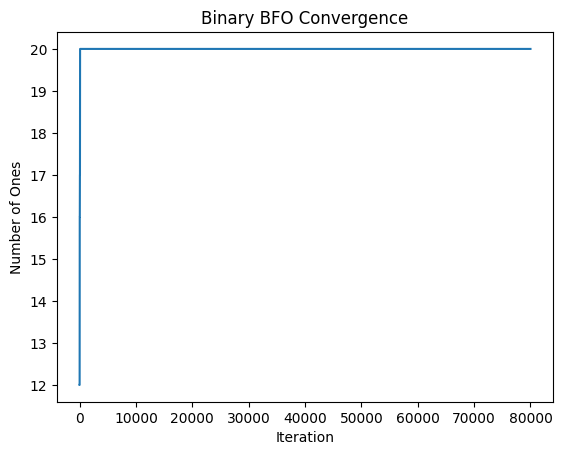

In [5]:
def binary_bfo():
    # Parameters for binary version
    population_size = 50
    dimension = 20  # Binary string length
    flip_probability = 0.05  # Probability of flipping a bit

    # Initialize binary population
    population = np.random.randint(0, 2, (population_size, dimension))
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    # Binary objective function (count ones)
    def binary_objective(x):
        return -np.sum(x)  # Negative because we want to maximize ones

    for elimination in range(elimination_dispersal_events):
        for reproduction in range(reproduction_steps):
            for bacterium in range(population_size):
                current_fitness = binary_objective(population[bacterium])
                if current_fitness < best_fitness:
                    best_fitness = current_fitness
                    best_solution = population[bacterium].copy()

                for chemotaxis in range(chemotactic_steps):
                    # Binary tumble - flip some bits
                    new_position = population[bacterium].copy()
                    flip_mask = np.random.rand(dimension) < flip_probability
                    new_position[flip_mask] = 1 - new_position[flip_mask]
                    new_fitness = binary_objective(new_position)

                    # Binary swim - continue flipping if improving
                    swim_count = 0
                    while swim_count < swim_length and new_fitness < current_fitness:
                        population[bacterium] = new_position
                        current_fitness = new_fitness
                        new_position = population[bacterium].copy()
                        flip_mask = np.random.rand(dimension) < flip_probability
                        new_position[flip_mask] = 1 - new_position[flip_mask]
                        new_fitness = binary_objective(new_position)
                        swim_count += 1

                    if current_fitness < best_fitness:
                        best_fitness = current_fitness
                        best_solution = population[bacterium].copy()

                    fitness_history.append(-best_fitness)  # Convert back to positive

            # Reproduction
            fitness_values = [binary_objective(b) for b in population]
            sorted_indices = np.argsort(fitness_values)
            population = population[sorted_indices[:population_size//2]]
            population = np.vstack([population, population])

        # Elimination-dispersal
        for bacterium in range(population_size):
            if np.random.rand() < elimination_probability:
                population[bacterium] = np.random.randint(0, 2, dimension)

    return best_solution, -best_fitness, fitness_history

# Test Binary BFO
best_solution, best_fitness, history = binary_bfo()
print(f"Binary BFO - Best solution: {best_solution}, Number of ones: {best_fitness}")

plt.plot(history)
plt.title("Binary BFO Convergence")
plt.xlabel("Iteration")
plt.ylabel("Number of Ones")
plt.show()

Loading dataset...
Dataset loaded. Training samples: 1437

Starting BFO (Mutation + Adaptive Step Size)...
Gen [1/500] | Best Fitness: 0.012526 | Avg Fitness: 0.020738 | Best Params: [6.86263537e+01 1.00000000e-04 1.40129620e+00]
Gen [2/500] | Best Fitness: 0.011830 | Avg Fitness: 0.018302 | Best Params: [6.72021635e+01 1.00000000e-04 1.50956623e+00]
Gen [3/500] | Best Fitness: 0.014614 | Avg Fitness: 0.016980 | Best Params: [4.03829532e+01 1.00000000e-04 1.28649426e+00]
Gen [4/500] | Best Fitness: 0.013222 | Avg Fitness: 0.016423 | Best Params: [4.82483779e+01 1.00000000e-04 1.25768228e+00]
Gen [5/500] | Best Fitness: 0.013222 | Avg Fitness: 0.016493 | Best Params: [4.68483351e+01 1.00000000e-04 1.63417594e+00]
Gen [6/500] | Best Fitness: 0.013222 | Avg Fitness: 0.019068 | Best Params: [4.65137174e+01 1.00000000e-04 1.16954578e+00]
Gen [7/500] | Best Fitness: 0.012526 | Avg Fitness: 0.015066 | Best Params: [7.24790445e+01 1.00000000e-04 1.79868908e+00]
Gen [8/500] | Best Fitness: 0.01

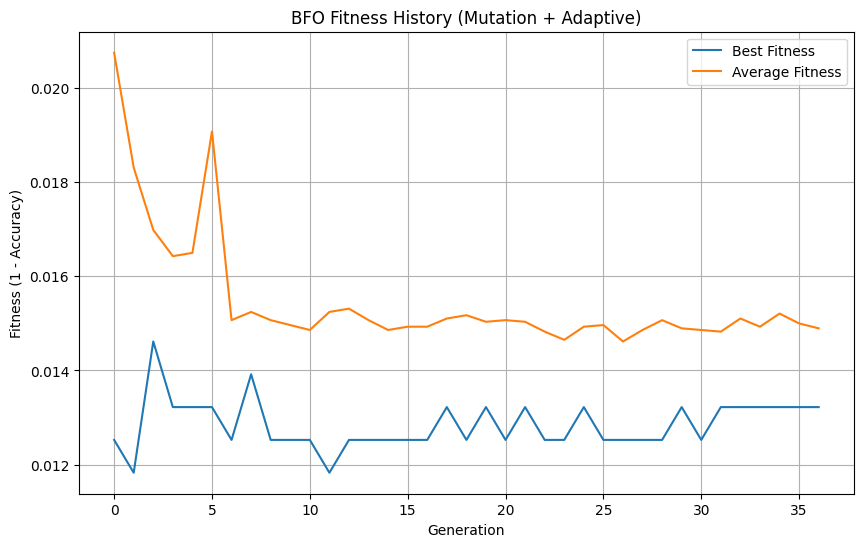

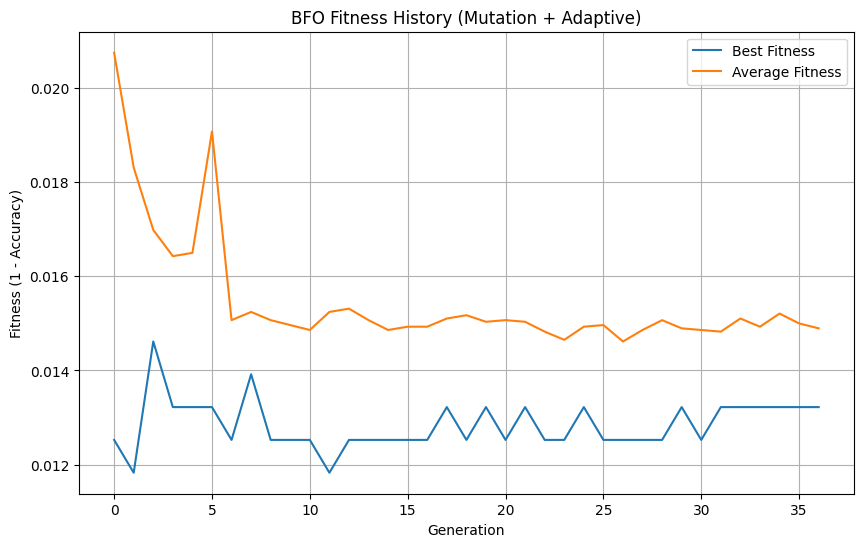

In [13]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import time


# Parameters
S = 40
Nc = 8
Ns = 6
Nre = 50
Ped = 0.25
dim = 3
C_init = 0.4
mutation_rate = 0.2
mutation_strength = 0.6
early_stopping_threshold = 1e-4
patience = 10

bounds = [[1, 100], [1e-4, 1], [0, 3.999]]  # kernel index: 0 to 3.999
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']


def objective_function(params, X_train, y_train):
    """Calculates the fitness (1 - cross-validation accuracy) for SVM."""
    C, gamma, kernel_idx = params
    # Ensure kernel_idx is a valid integer index
    kernel_idx = int(np.clip(kernel_idx, 0, len(kernel_list) - 1))
    kernel = kernel_list[kernel_idx]

    if C <= 0 or gamma <= 0:
        return 1.0  # Return worst fitness for invalid parameters

    try:
        model = SVC(C=C, gamma=gamma, kernel=kernel, probability=False)
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
        return 1 - np.mean(scores)
    except ValueError as e:
        print(f"SVC Error with params C={C}, gamma={gamma}, kernel={kernel}: {e}")
        return 1.0  # Return worst fitness on error


def tumble(dim):
    """Generates a random direction vector."""
    delta = np.random.randn(dim)
    return delta / np.linalg.norm(delta)


def clip_to_bounds(x, bounds):
    """Clips a solution vector to the defined bounds."""
    return np.array([np.clip(x[i], bounds[i][0], bounds[i][1]) for i in range(len(bounds))])


def bfo_mutation_adaptive(X_train, y_train, S, Nc, Ns, Nre, Ned, Ped, dim, C_init, mutation_rate, mutation_strength, bounds, early_stopping_threshold, patience):
    """BFO with Mutation and Adaptive Step Size (from notebook)."""
    # Initialization
    P = np.array([np.random.uniform(low, high, S) for low, high in bounds]).T
    C_step = np.ones(S) * C_init  # Step size for each bacterium

    # Tracking
    best_fitness_history = []
    avg_fitness_history = []
    no_improve_counter = 0
    last_best = np.inf
    global_best_fitness = np.inf
    global_best_params = None

    start_time = time.time()

    for ell in range(Ned):
        for k in range(Nre):
            fitness = np.array([objective_function(p, X_train, y_train) for p in P])
            J_last = fitness.copy()

            for j in range(Nc):
                for i in range(S):
                    delta = tumble(dim)
                    P[i] = P[i] + C_step[i] * delta
                    P[i] = clip_to_bounds(P[i], bounds)

                    current_fitness = objective_function(P[i], X_train, y_train)

                    # Swim
                    m = 0
                    while m < Ns:
                        m += 1
                        if current_fitness < J_last[i]:  # Improved?
                            J_last[i] = current_fitness
                            # Move again in the same direction
                            P[i] = P[i] + C_step[i] * delta
                            P[i] = clip_to_bounds(P[i], bounds)
                            current_fitness = objective_function(P[i], X_train, y_train)
                        else:
                            break

            fitness = J_last

            for i in range(S):
                if np.random.rand() < mutation_rate:
                    mutation_vec = np.random.randn(dim) * mutation_strength
                    P[i] = P[i] + mutation_vec
                    P[i] = clip_to_bounds(P[i], bounds)

            fitness = np.array([objective_function(p, X_train, y_train) for p in P])

            idx = np.argsort(fitness)
            P = P[idx]
            fitness = fitness[idx]
            C_step = C_step[idx]

            half_S = S // 2
            P[half_S:] = P[:half_S]
            fitness[half_S:] = fitness[:half_S]
            C_step[half_S:] = C_step[:half_S]

            C_step *= 0.97  # Apply decay to all step sizes

            # --- Tracking & Early Stopping ---
            best_fitness_current_gen = fitness[0]
            avg_fitness_current_gen = np.mean(fitness)
            best_fitness_history.append(best_fitness_current_gen)
            avg_fitness_history.append(avg_fitness_current_gen)

            if best_fitness_current_gen < global_best_fitness:
                global_best_fitness = best_fitness_current_gen
                global_best_params = P[0].copy()
                no_improve_counter = 0
            else:
                no_improve_counter += 1

            print(f"Gen [{(ell * Nre) + k + 1}/{Ned * Nre}] | Best Fitness: {best_fitness_current_gen:.6f} | Avg Fitness: {avg_fitness_current_gen:.6f} | Best Params: {P[0]}")

            if abs(last_best - best_fitness_current_gen) < early_stopping_threshold:
                no_improve_counter += 1
            else:
                no_improve_counter = 0
            last_best = best_fitness_current_gen

            if no_improve_counter >= patience:
                print(f"\nEarly Stopping at Generation {(ell * Nre) + k + 1}: No significant improvement for {patience} generations.")
                break

        if no_improve_counter >= patience:
            break

        for i in range(S):
            if np.random.rand() < Ped:
                P[i] = np.array([np.random.uniform(low, high) for low, high in bounds])

    end_time = time.time()
    print(f"\nBFO finished in {end_time - start_time:.2f} seconds.")

    # Final Evaluation (Find best overall)
    final_fitness = np.array([objective_function(p, X_train, y_train) for p in P])
    best_idx_final = np.argmin(final_fitness)
    if final_fitness[best_idx_final] < global_best_fitness:
        global_best_fitness = final_fitness[best_idx_final]
        global_best_params = P[best_idx_final].copy()

    print("\nBest Parameters Found Overall:")
    C_best, gamma_best, kernel_idx_best = global_best_params
    kernel_best = kernel_list[int(np.clip(kernel_idx_best, 0, len(kernel_list) - 1))]
    print(f"  C = {C_best}")
    print(f"  Gamma = {gamma_best}")
    print(f"  Kernel = {kernel_best}")
    print(f"  Best Fitness (1 - Accuracy) = {global_best_fitness:.6f}")

    return global_best_params, global_best_fitness, best_fitness_history, avg_fitness_history


if __name__ == '__main__':

    from sklearn.datasets import load_digits
    from sklearn.model_selection import train_test_split

    # Define the missing variable 'Ned' (number of generations)
    Ned = 10  # Example value, adjust as needed

    print("Loading dataset...")
    digits = load_digits()
    X, y = digits.data, digits.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Dataset loaded. Training samples: {X_train.shape[0]}")

    print("\nStarting BFO (Mutation + Adaptive Step Size)...")
    best_params, best_fitness, best_hist, avg_hist = bfo_mutation_adaptive(
        X_train, y_train,
        S, Nc, Ns, Nre, Ned, Ped, dim, C_init,
        mutation_rate, mutation_strength, bounds,
        early_stopping_threshold, patience
    )

    # Optional: Plotting fitness history
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(best_hist, label='Best Fitness')
        plt.plot(avg_hist, label='Average Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (1 - Accuracy)')
        plt.title('BFO Fitness History (Mutation + Adaptive)')
        plt.legend()
        plt.grid(True)
        plt.savefig('bfo_mutation_adaptive_history.png')
        print("\nFitness history plot saved to bfo_mutation_adaptive_history.png")
        # plt.show() # Uncomment to display plot if running interactively
    except ImportError:
        print("\nMatplotlib not found. Skipping fitness history plot.")


    # Optional: Plotting fitness history
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(best_hist, label='Best Fitness')
        plt.plot(avg_hist, label='Average Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (1 - Accuracy)')
        plt.title('BFO Fitness History (Mutation + Adaptive)')
        plt.legend()
        plt.grid(True)
        plt.savefig('bfo_mutation_adaptive_history.png')
        print("\nFitness history plot saved to bfo_mutation_adaptive_history.png")
        # plt.show() # Uncomment to display plot if running interactively
    except ImportError:
        print("\nMatplotlib not found. Skipping fitness history plot.")
